## Build basic linear regression model via python


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# load dataset
data = pd.read_csv('/Users/zhiqi22/study/data.csv')

In [4]:
# review the data
data # or data.shape

(11, 2)

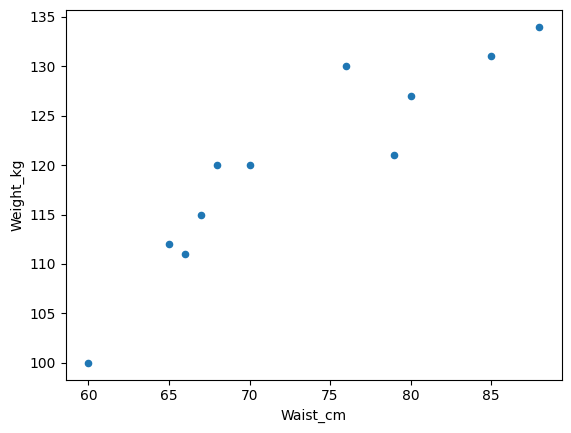

In [5]:
data.plot(kind='scatter', x='Waist_cm', y= 'Weight_kg')
plt.show()

In [7]:
data.plot(kind='box')
plt.show()
data.corr() # correlation coefficients

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.918059
Weight_kg,0.918059,1.000000


In [8]:
# change to dataframe variables
Waist=pd.DataFrame(data['Waist_cm'])
Weight=pd.DataFrame(data['Weight_kg'])

In [10]:
#Build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(Waist, Weight)

In [11]:
model.coef_

array([[1.03558679]])

In [12]:
model.intercept_

array([44.39892905])

In [13]:
model.score(Waist, Weight)
# evaluate the model

0.8428329113206972

In [19]:
#Predict new value of weight
import numpy as np
Waist_new=np.array(79)
Waist_new = Waist_new.reshape(-1,1)
print(Waist_new)
Weight_predict=model.predict(Waist_new)
Weight_predict


[[79]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[126.21028559]])

In [20]:
#predict more values
X = ([67,68,100])
x=pd.DataFrame(X)
Y=model.predict(x)
Y=pd.DataFrame(Y)
df=pd.concat([x,Y],axis=1,keys=['Waist_new_cm','Weight_newPredict_kg'])
df

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Waist_new_cm,Weight_newPredict_kg
,0,0
0,67,113.783244
1,68,114.818831
2,100,147.957608


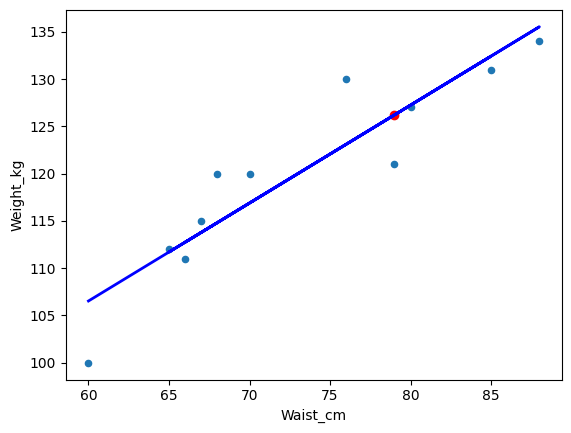

In [23]:
#Visualize the result
data.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.plot(Waist,model.predict(Waist),color='blue',linewidth=2)
plt.scatter(Waist_new,Weight_predict,color='red')
plt.show()

## Build linear regression model from scratch

In [28]:
#create known parameters
import torch

weight = 0.7
bias = 0.3
# create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]
#X.shape

torch.Size([50, 1])

In [49]:
len(X), len(Y)


(50, 50)

In [47]:
## Spliting data into training and testing sets
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split] # we are using indexing here
X_test, Y_test = X[train_split:], Y[train_split:]

In [48]:
len(X_train),len(X_test)#training data, testing data
len(Y_train),len(Y_test)#training label, testing labels

(40, 10)

## Visualize data

In [53]:
import matplotlib.pyplot as plt
def plot_pred(train_data = X_train,
            train_label = Y_train,
            test_data=X_test,
            test_label= Y_test,
            pred=None):
    plt.figure(figsize=(5,5))

    plt.scatter(train_data, train_label, c='b',s=4,label='Training data')
    plt.scatter(test_data,test_label,c='r',s=4, label='Testing data')

    if pred is not None:
        plt.scatter(test_data,pred)
        plt.scatter(test_data,pred,c='r',s=4, label='predictions')
#plt.legend(prop={"size":14})


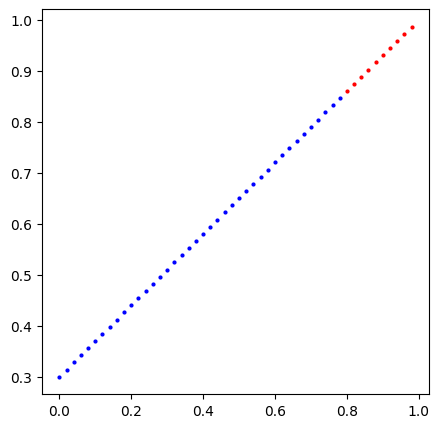

In [54]:
plot_pred()

This is the ideal output, we know the relationship between x and y, because we create the linear regression model with pre_set parameters.

## Building our first pytorch model!
What our model does, start with random values (weight & bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 
We can do this through:

* Gradient descent
* Back propogation

In [55]:
# Revisit the linear regression model again
# 1: create a linear regression model class
# This class inherits from nn.module (built-in)
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

        # forward defines the computation in the model
        def forward(self, x:torch.Tensor)->torch.Tensor:
            return self.weight * x + self.bias 


## Linear regression with gradient descent

In [1]:
%%bash
pip install plotly==5.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 42.3 MB/s eta 0:00:00


You should consider upgrading via the '/home/zli3/PyTorch/bin/python -m pip install --upgrade pip' command.


In [6]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot

In [15]:
# Data first!
path = os.path.abspath('data.txt') # get the absolute complete path of the file
print(path)
data_df = pd.read_csv((path), header=None, names=['X','y'])
data_df.head() # fetch the head of the dataframe
data_df.dtypes

/home/zli3/Documents/AIM-MLWorkshop/w4/data.txt


X    float64
y    float64
dtype: object

In [21]:
# Let's find more about the data
n_rows = data_df.shape[0]
# How about print the datatype of 'X'?
print('The datatype of X is :', data_df['X'].dtype)
# Change the X of the original data into a (n_rows, 1) array
X = data_df['X'].to_numpy().reshape(n_rows,1)
# After converting, check the shape of X again
print('X.shape:', X.shape)
# Generate a all one vector with shape of (n_rows, 1)
ones = np.ones((n_rows,1))
# Represent X with an additional dim for vector computation
X = np.concatenate((ones, X), axis=1)
X.shape

The datatype of X is : float64
X.shape: (23, 1)


(23, 2)

In [ ]:
# y variable
y = data_df['y'].to_numpy().reshape(n_rows, 1)

In [ ]:
#now let's visualize the data
plt.scatter()
plt.xlabel()
plt.ylabel()
plt.title() # this is optional

The loss function is also called the cost function, which is a function used to measure the difference between the value h(θ) predicted by the model and the real value y. If there are multiple samples, the values of all cost functions can be calculated. Find the mean, and denote it as J(θ). 

For a linear model with only one variable/feature (e.g., x=size of the room, y=house price prediction)
 Cost function (**mean square error**) is given by
$$
J\left(\theta_0, \theta_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(h_\theta\left(x_i\right)-y_i\right)^2
$$
Where $h_\theta(x_i) = \theta^T x$
* m: the number of training samples in the dataset
* $h_{\theta}(x)$ is the estimation, it can be formulated as: $h_{\theta}(x) = \theta_0 + \theta_1 x_1^{(i)} $
* y is the real value of the original training set

### All we need to do is find the value of θ that minimizes J(θ)


#### 1. Calculate the gradient of this cost function
$$
\begin{gathered}
\nabla J(\Theta)=\left\langle\frac{\partial J}{\partial \Theta_0}, \frac{\partial J}{\partial \Theta_1}\right\rangle \\
\frac{\partial J}{\partial \Theta_0}=\frac{1}{m} \sum_{i=1}^m\left(h_{\Theta}\left(x^{(i)}\right)-y^{(i)}\right) \\
\frac{\partial J}{\partial \Theta_1}=\frac{1}{m} \sum_{i=1}^m\left(h_{\Theta}\left(x^{(i)}\right)-y^{(i)}\right) x_1^{(i)}
\end{gathered}
$$
#### 2. Adjust the shape of the variable x
> Since we have two theta variable here, we need to add an addtional dimension to x
Which means shape of x will change from [1,m] to [2,m]

In [ ]:
def compute_cost(data, data, theta = np.array([[],[]])):
    '''
        Given covariate matrix X, 
        the prediction results y,
        and coefficients theta 
        compute the loss
    '''

## TODO 
`def gradient_descent_algorithm():`

In [ ]:
num_iterations=1500
theta_init=np.array([[1],[1]])
print('theta_init shape:', theta_init.shape) 
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [ ]:
# using computed theta to plot the fitting graph
plt.figure()
plt.scatter(X,y)
plt.plot(X, theta[0] + theta[1]*X, color='r')
plt.title('Linear Regression Fitting Based on Gradient Descent Algorithm')
plt.grid(True)
plt.show()

## Useful resources
* Linear regression 

    - [1](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
    - [2](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression)

* Logistic regression
    - [1](https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/)
* Pandas
    - [Pandas at Kaggle](https://www.kaggle.com/learn/pandas)
    - [10 tricks](https://medium.com/towards-data-science/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba)